<a href="https://colab.research.google.com/github/chayanisbun/creditcard-clustering/blob/main/Cluster_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
upload = files.upload()

Saving credit_card.csv to credit_card.csv


# Choose Feature

1. PURCHASES
2. CASH_ADVANCE
3. MINIMUM_PAYMENTS
4. TENURE

Reason:
- PURCHASES, CASHADVANCE, and MINIMUM_PAYMENTS directly impact the bank's revenue. By analyzing these variables, we can understand how much customers are spending, borrowing, and paying back each month. This information helps us evaluate the bank's overall financial performance.

- TENURE indicates how long customers have been with the bank. This variable is important because long-tenure customers tend to be more loyal and profitable.

In [ ]:
df = pd.read_csv('credit_card.csv', usecols= ['PURCHASES', 'CASH_ADVANCE', 'MINIMUM_PAYMENTS', 'TENURE'])
df.head()

,PURCHASES,CASH_ADVANCE,MINIMUM_PAYMENTS,TENURE
0,95.40,0.000000,139.509787,12
1,0.00,6442.945483,1072.340217,12
2,773.17,0.000000,627.284787,12
3,1499.00,205.788017,NaN,12
4,16.00,0.000000,244.791237,12


# Replace outliers and null values with 0

In [ ]:
# Replace null values with 0
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PURCHASES         8950 non-null   float64
 1   CASH_ADVANCE      8950 non-null   float64
 2   MINIMUM_PAYMENTS  8950 non-null   float64
 3   TENURE            8950 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 279.8 KB


In [ ]:
# Replace outliers values with 0
# z-score sklearn
scaler = StandardScaler() #create StandardScaler instance
cols = df[['PURCHASES', 'CASH_ADVANCE', 'MINIMUM_PAYMENTS', 'TENURE']]
scaler.fit(cols) #compute the mean and std
z = scaler.transform(cols) #calculate z-score
z = np.where(np.abs(z)>3,0,z)
dz = pd.DataFrame(z,columns=['Z_PURCHASES', 'Z_CASH_ADVANCE', 'Z_MINIMUM_PAYMENTS', 'Z_TENURE'])
dz

,Z_PURCHASES,Z_CASH_ADVANCE,Z_MINIMUM_PAYMENTS,Z_TENURE
0,-0.424900,-0.466786,-0.297310,0.36068
1,-0.469552,2.605605,0.102042,0.36068
2,-0.107668,-0.466786,-0.088489,0.36068
3,0.232058,-0.368653,-0.357035,0.36068
4,-0.462063,-0.466786,-0.252238,0.36068
...,...,...,...,...
8945,-0.333293,-0.466786,-0.336106,0.00000
8946,-0.329136,-0.466786,-0.357035,0.00000
8947,-0.401965,-0.466786,-0.321751,0.00000
8948,-0.469552,-0.449352,-0.333166,0.00000


# Find number of cluster

## Elbow method

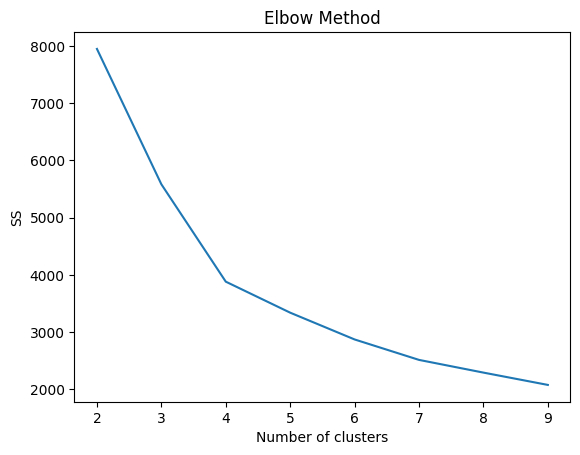

In [ ]:
from sklearn.cluster import KMeans
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dz)
    ss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(2, 10), ss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.show()

## Silhouette score

silhouette score for 9 Cluster: 0.4357


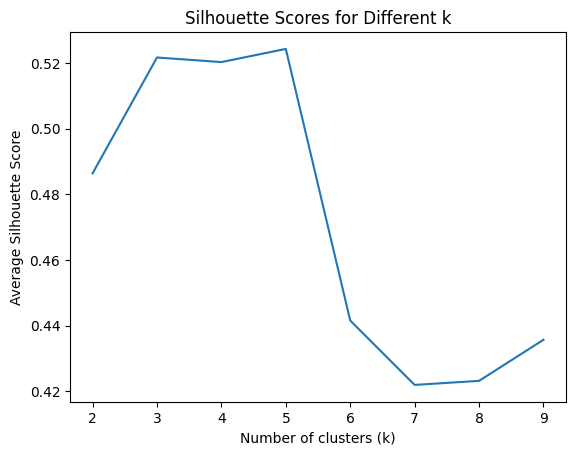

In [ ]:
# silhouette score

x = dz.values

krange = range(2,10)
avg_silhouettes = []
for n in krange:
    model = KMeans(n_clusters=n, random_state=42, n_init=10)
    cluster_assignments = model.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

print('silhouette score for %i Cluster: %0.4f' % (n, silhouette_avg))

plt.plot(krange, avg_silhouettes)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# K-Mean

In [ ]:
#sample = df[['Z_PURCHASES', 'Z_CASH_ADVANCE', 'Z_MINIMUM_PAYMENTS', 'Z_TENURE']]

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(dz)

dz['cluster'] = kmeans.labels_
dz

,Z_PURCHASES,Z_CASH_ADVANCE,Z_MINIMUM_PAYMENTS,Z_TENURE,cluster
0,-0.424900,-0.466786,-0.297310,0.36068,0
1,-0.469552,2.605605,0.102042,0.36068,3
2,-0.107668,-0.466786,-0.088489,0.36068,0
3,0.232058,-0.368653,-0.357035,0.36068,0
4,-0.462063,-0.466786,-0.252238,0.36068,0
...,...,...,...,...,...
8945,-0.333293,-0.466786,-0.336106,0.00000,0
8946,-0.329136,-0.466786,-0.357035,0.00000,0
8947,-0.401965,-0.466786,-0.321751,0.00000,0
8948,-0.469552,-0.449352,-0.333166,0.00000,0


In [ ]:
group = dz.groupby('cluster').mean()
group

,Z_PURCHASES,Z_CASH_ADVANCE,Z_MINIMUM_PAYMENTS,Z_TENURE
cluster,,,,
0,-0.245471,-0.322368,-0.190863,0.309209
1,1.191793,-0.342356,-0.081893,0.330456
2,-0.240412,-0.021353,-0.189221,-1.868003
3,-0.276889,1.306202,0.138022,0.251845
4,-0.005271,-0.063926,1.136584,0.319326


# Result

## Interpret the clusters

**Cluster 0:** This cluster represents customers with relatively low purchase activity, low cash advances, and average minimum payments and tenure. Define this cluster as "Low Activity"

**Cluster 1:** This cluster shows high purchase activity, average cash advances, and average minimum payments and tenure. Define this cluster as "High Purchasers"

**Cluster 2:** This cluster is characterized by low purchase activity, low cash advances, and relatively high minimum payments. Define this cluster as "Short Tenure, Low Activity"

**Cluster 3:** This cluster has low purchase activity, high cash advances, and average minimum payments and tenure. Define this cluster as "Cash Advance Heavy Users"

**Cluster 4:** This cluster shows average purchase activity, low cash advances, and high minimum payments. Define this cluster as "High Minimum Payments"

## Marketing strategy for each group

**Cluster 0 (Low Activity):** Focus on re-engagement with targeted rewards and balance transfer offers.

**Cluster 1 (High Purchasers):** Offer premium and exclusive benefits to retain high-value customers.

**Cluster 2 (Short Tenure, Low Activity):** Use retention and introductory offers to encourage more frequent usage.

**Cluster 3 (Cash Advance Heavy Users):** Provide personal loan products and financial counseling to reduce reliance on cash advances.

**Cluster 4 (High Minimum Payments):** Engage them with installment plans, large purchase offers, and loyalty programs to reward their consistent payments.

## Choose cluster to focus on

We are decided focus on **Cluster 1** and **Cluster 4** because

**Cluster 1 (High Purchasers)** are top customers who drive revenue through high purchase activity. Retaining and rewarding them will ensure continued revenue growth.

**Cluster 4 (High Minimum Payments)** are reliable, responsible, and exhibit good payment behavior, making them low-risk, high-value customers.

Focusing on these clusters ensures we retain high-value customers.